### Part 1: Understanding Product Categories
#### Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

**1. Frequency Tables:**

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

**2. Visualizations:**

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [18]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [5]:
df.head(1)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [26]:
frequency_table=df["category"].value_counts()
frequency_table_top_5=frequency_table.sort_values(ascending=False)[:5]
frequency_table_top_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

/var/folders/39/fj4zfthj4yg686qgwrvxw_pc0000gp/T/ipykernel_69894/942784615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_top_5.index,y=frequency_table_top_5.values,palette="Set3")


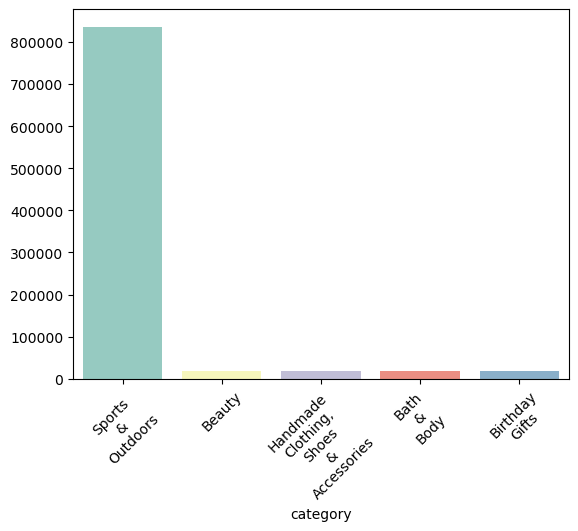

In [25]:
frequency_table_top_5.index = frequency_table_top_5.index.str.replace(" ", "\n")
sns.barplot(x=frequency_table_top_5.index,y=frequency_table_top_5.values,palette="Set3")
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [32]:
df_top_5_categories=df.loc[df['category'].isin(["Sports & Outdoors", "Beauty", "Handmade Clothing", "Shoes & Accessories", "Bath & Body", "Birthday Gifts"])]

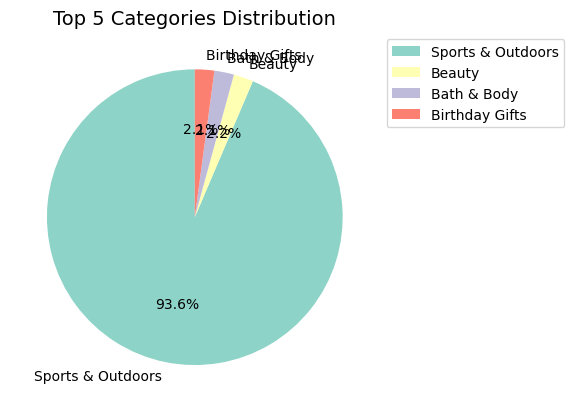

In [37]:
ax=df_top_5_categories['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

plt.ylabel('') 
plt.title('Top 5 Categories Distribution', fontsize=14)

ax.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
plt.show()


### Part 2: Delving into Product Pricing
#### Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

**1. Measures of Centrality:**

- Calculate the mean, median, and mode for the price of products
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

**2. Measures of Dispersion:**

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

**3. Visualizations:**

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [43]:
print(f"Mean: {df["price"].mean().round(2)}")
print(f"Median: {df["price"].median()}")
print(f"Mode: {df["price"].mode()[0]}")
#Average price is 89.24. Meanwhile the mode is 9.99. That means that there might be a few products with fairly high prices, pulling the mean up.

Mean: 89.24
Median: 19.09
Mode: 9.99


In [53]:
print(f"Variance: {round(df["price"].var(),2)}")
print(f"Std: {round(df["price"].std(),2)}")
print(f"Range: {round(df["price"].max()-df["price"].min(),2)}")
print(f"IQR: {round(df["price"].quantile(0.75)-df["price"].quantile(0.25),2)}")
#the products' prices are highly varied. std and range allow us to see that there are large differences between prices


Variance: 119445.49
Std: 345.61
Range: 100000.0
IQR: 36.0


<Axes: xlabel='price', ylabel='Count'>

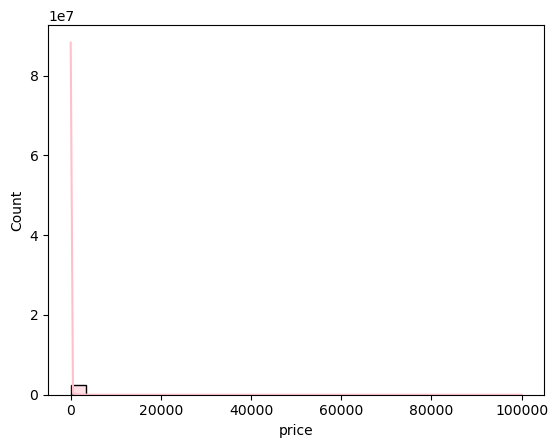

In [73]:
sns.histplot(data=df["price"],kde=True, bins=30, color="pink") #it is hard to see something. migt be because of outlier prices.
#it could be solved by taking out the outliers, or by cutting out data from a certain price

<Axes: xlabel='price', ylabel='Count'>

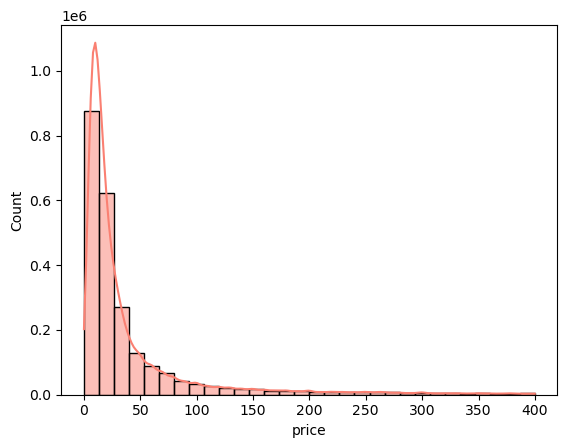

In [78]:
#cutting out data from a certain price:
df_lower_prices=df[df["price"]<400]
sns.histplot(data=df_lower_prices["price"],kde=True, bins=30, color="salmon")

<Axes: ylabel='price'>

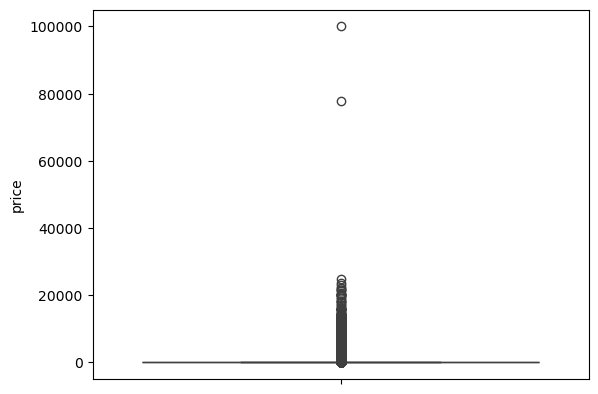

In [79]:
sns.boxplot(data=df["price"]) #There is one product that costs 100000, and one that costs almost 80000.

### Part 3: Unpacking Product Ratings
#### Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

**1. Measures of Centrality:**

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

**2. Measures of Dispersion:**

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

**3. Shape of the Distribution:**

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

**4. Visualizations:**

- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [84]:
print(f"Mean: {df["stars"].mean().round(2)}")
print(f"Median: {df["stars"].median()}")
print(f"Mode: {df["stars"].mode()[0]}")
#customers usually give 0 stars. although i'm not sure if 1 might be the minimum. If that is the case, it might be because many products are simply not rated. And therefore it accounts for 0 stars.

Mean: 2.15
Median: 0.0
Mode: 0.0


In [90]:
print(f"Variance: {round(df["stars"].var(),2)}")
print(f"Std: {round(df["stars"].std(),2)}")
print(f"IQR: {round(df["stars"].quantile(0.75)-df["stars"].quantile(0.25),2)}")
#since the difference between quantiles is pretty large, that means that values seem to be rather extreme. Either pretty low or pretty high.

Variance: 4.82
Std: 2.19
IQR: 4.4


In [95]:
print(f"Skew: {round(df['stars'].skew(),3)}")
print(f"Kurtosis: {round(df['stars'].kurtosis(),3)}")
#no significant skewness
#has thinner tails and is flatter compared to a normal distribution

Skew: 0.081
Kurtosis: -1.926


<Axes: xlabel='stars', ylabel='Count'>

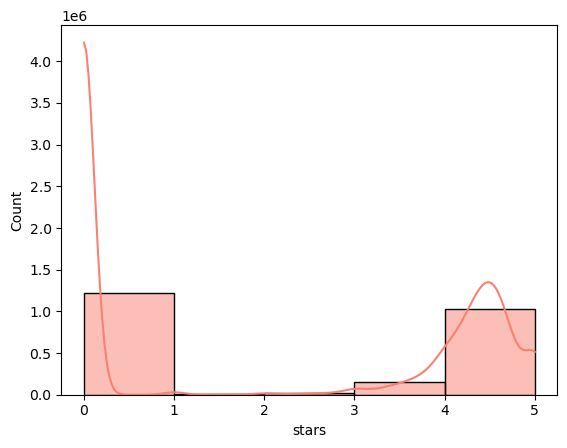

In [98]:
sns.histplot(data=df["stars"],bins=5,color="salmon",kde=True)

High IQR (4.4): Reflects the wide gap between the central ratings (lower 25% are close to 0, upper 75% are near 4–5)
Platykurtosis (-1.926): The bimodal shape flattens the peak overall, making the distribution less "sharp."

Insights:
The ratings are polarized: most customers either love (4–5 stars) or hate (0 stars) the products, with few neutral ratings. This aligns with a high IQR but flat kurtosis.